# 08 - SVM

In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [11]:
# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")

In [12]:
# Define features (X) and target (y)
target_column = "Rating"  # Replace with your actual target column name if different
X = df.drop(columns=[target_column])
y = df[target_column]

In [13]:
# Feature scaling (SVM is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Initialize SVM Regressor with RBF Kernel
svm_model = SVR(
    kernel='rbf',  # Radial Basis Function kernel (default, good for non-linear data)
    C=1.0,  # Regularization parameter
    epsilon=0.1  # Defines margin of tolerance
)

In [16]:
# Train the model
svm_model.fit(X_train, y_train)

SVR()

In [17]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Lower MSE = better model
# Lower RMSE = better model
# Lower MAE = better model
# R² Score
# 1.0: Perfect model (explains all the variance).
# 0.0: Model performs no better than a horizontal line (mean prediction).

# Linear Regression - 01
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Error (MAE): 0.2915
# R² Score: 0.5034

# XGBoost - 02
# Mean Squared Error (MSE): 0.1269
# Root Mean Squared Error (RMSE): 0.3563
# Mean Absolute Error (MAE): 0.2802
# R² Score: 0.5255

# CatBoost - 03
# Mean Squared Error (MSE): 0.1228
# Root Mean Squared Error (RMSE): 0.3504
# Mean Absolute Error (MAE): 0.2792
# R² Score: 0.5411

# AdaBoost - 04
# Mean Squared Error (MSE): 0.1453
# Root Mean Squared Error (RMSE): 0.3811
# Mean Absolute Error (MAE): 0.3070
# R² Score: 0.4570

# LightGBM - 05
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Error (MAE): 0.2915
# R² Score: 0.5034

# Random forest - 06
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Erro

# KNN - 07
# Mean Squared Error (MSE): 0.1890
# Root Mean Squared Error (RMSE): 0.4348
# Mean Absolute Error (MAE): 0.3478
# R² Score: 0.2933


# my opinion:
# R² Score is very low
# even lower than in KNN
# I want to check why these two models showed very low score
# for this I will upload my dataset to ChatGPT and ask
# "explain me why KNN and SVM have a very low R² Score metric in my dataset"

# the answer in the screenshots below:

Mean Squared Error (MSE): 0.2097
Root Mean Squared Error (RMSE): 0.4579
Mean Absolute Error (MAE): 0.3797
R² Score: 0.2161


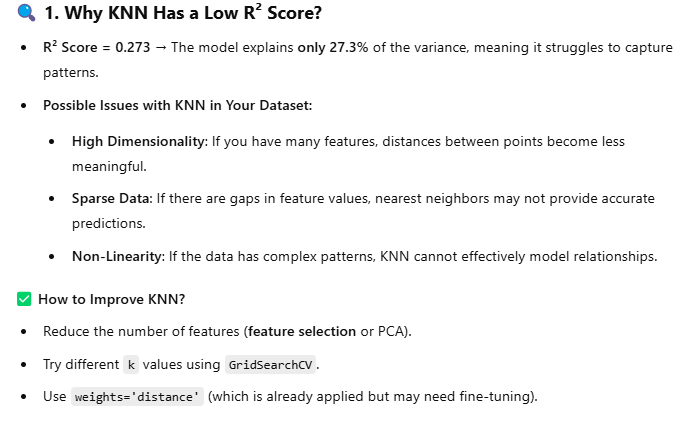

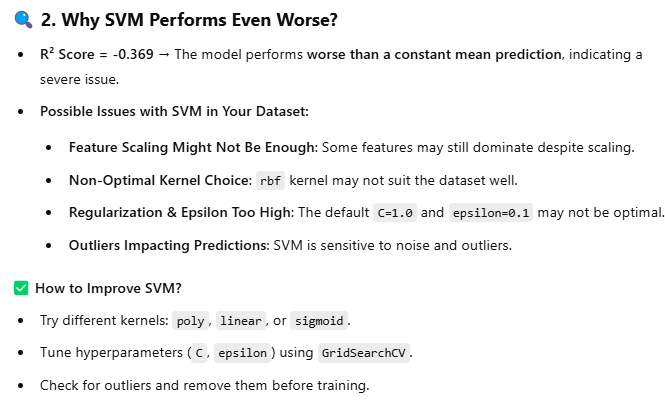

In [ ]:
# when I try all models
# I will choose one with the best metric
# and I will try to improve this score

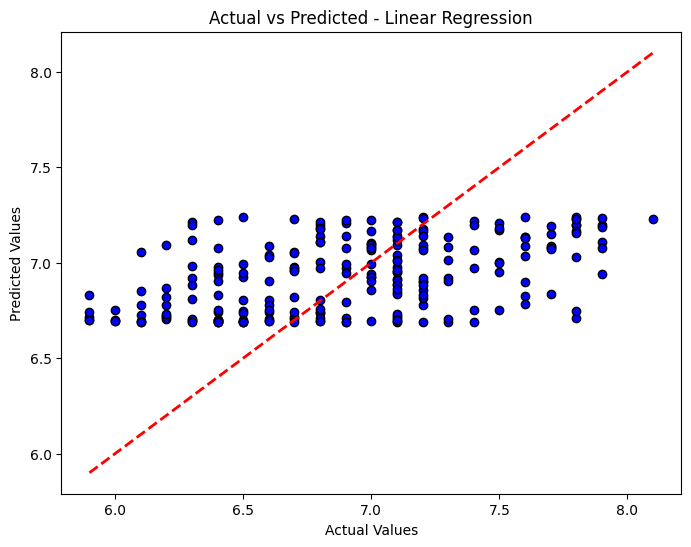

In [19]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

# linear graph does not appear at all here

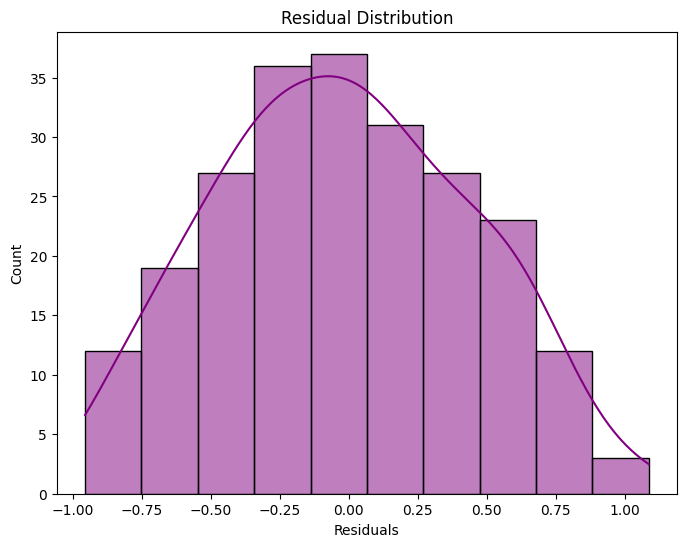

In [20]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# wow, distribution changed!
# and it looks good
